In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [2]:
df = pd.read_csv('final_merged_data.csv')

In [3]:
df.columns

Index(['restaurant', 'item', 'ms_item', 'matched_2021', 'new_item_2022',
       'food_category', 'item_description', 'calories', 'total_fat',
       'saturated_fat', 'trans_fat', 'cholesterol', 'sodium', 'carbohydrates',
       'dietary_fiber', 'sugar', 'protein', 'bestseller', 'price'],
      dtype='object')

In [4]:
# Basic data exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (978, 19)

First 5 rows:


,restaurant,item,ms_item,matched_2021,new_item_2022,food_category,item_description,calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,dietary_fiber,sugar,protein,bestseller,price
0,arbys,classic roast beef,classic roast beef,0,1,Sandwiches,"Classic Roast Beef, Slow Roasted Beef",970,29.0,19.0,0.5,90.0,590,158.0,2.0,138.0,22.0,1,6.79
1,arbys,classic beef 'n cheddar,classic beef ‘n cheddar,1,0,Sandwiches,"Classic Beef ‘n Cheddar, Slow Roasted Beef",470,19.0,8.0,0.0,70.0,1230,45.0,3.0,9.0,29.0,1,7.59
2,arbys,greek gyro,greek gyro,1,0,Sandwiches,"Greek Gyro, Market Fresh",15,0.0,0.0,0.0,0.0,180,3.0,0.0,2.0,0.0,1,10.29
3,arbys,roast beef gyro,roast beef gyro,1,0,Sandwiches,Roast Beef Gyro,510,24.0,9.0,1.5,95.0,1610,38.0,2.0,5.0,38.0,0,10.29
4,arbys,chicken tenders 3pc,chicken tenders (3),1,0,Entrees,"Chicken Tenders (3), Crispy Juicy Chicken",240,0.0,0.0,0.0,0.0,20,64.0,0.0,60.0,0.0,1,8.04


In [5]:
print("\nData types:")
print(df.dtypes)


Data types:
restaurant           object
item                 object
ms_item              object
matched_2021          int64
new_item_2022         int64
food_category        object
item_description     object
calories              int64
total_fat           float64
saturated_fat       float64
trans_fat           float64
cholesterol         float64
sodium               object
carbohydrates       float64
dietary_fiber       float64
sugar               float64
protein             float64
bestseller            int64
price               float64
dtype: object


In [6]:
# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing values per column:
cholesterol       4
carbohydrates     1
dietary_fiber    20
sugar             8
protein           1
price            22
dtype: int64


In [7]:
# Convert sodium to numeric
df['sodium'] = pd.to_numeric(df['sodium'], errors='coerce')

In [8]:
# Convert nutritional columns to numeric, handling non-numeric values
numeric_columns = ['calories', 'total_fat', 'saturated_fat', 'trans_fat', 
                  'cholesterol', 'sodium', 'carbohydrates', 'dietary_fiber', 
                  'sugar', 'protein']


# Summary statistics for nutritional values
print("\nSummary statistics for nutritional values:")
print(df[numeric_columns].describe())


Summary statistics for nutritional values:
          calories   total_fat  saturated_fat   trans_fat  cholesterol  \
count   978.000000  978.000000     978.000000  978.000000   974.000000   
mean    404.723926   20.233231       7.316973    0.219530    60.197125   
std     346.286449   22.210786      11.227148    0.544496    79.146865   
min       0.000000    0.000000       0.000000    0.000000     0.000000   
25%     190.000000    6.000000       2.000000    0.000000    10.000000   
50%     360.000000   17.000000       5.750000    0.000000    35.000000   
75%     520.000000   28.000000      10.000000    0.000000    80.000000   
max    4920.000000  312.000000     178.000000    5.000000   750.000000   

             sodium  carbohydrates  dietary_fiber       sugar     protein  
count    977.000000     977.000000     958.000000  970.000000  977.000000  
mean     821.755374      39.093142       2.276618   13.931959   16.957011  
std      939.602923      31.050734       2.999425   22.259551

In [9]:
# Display unique restaurants and food categories
print("\nNumber of unique restaurants:", df['restaurant'].nunique())
print("Unique restaurants:", df['restaurant'].unique())
print("\nNumber of food categories:", df['food_category'].nunique())
print("Food categories:", df['food_category'].unique())


Number of unique restaurants: 18
Unique restaurants: ['arbys' 'burger_king' 'chick-fil-a' 'chilis' 'culvers' 'dairy_queen'
 'dunkin_donuts' 'jimmy_johns' 'kfc' 'mcdonalds' 'panda_express' 'popeyes'
 'sonic' 'starbucks' 'subway' 'taco_bell' 'wendys' 'whataburger']

Number of food categories: 12
Food categories: ['Sandwiches' 'Entrees' 'Beverages' 'Fried Potatoes' 'Appetizers & Sides'
 'Desserts' 'Baked Goods' 'Burgers' 'Salads' 'Soup'
 'Toppings & Ingredients' 'Pizza']


In [10]:
# Check bestseller distribution
if 'bestseller' in df.columns:
    bestseller_counts = df['bestseller'].value_counts()
    print("\nBestseller Distribution:")
    print(bestseller_counts)

# Compare new vs. matched items
if 'new_item_2022' in df.columns and 'matched_2021' in df.columns:
    print("\nNew vs Matched Items:")
    print("New items (2022):", df['new_item_2022'].sum())
    print("Matched items (2021):", df['matched_2021'].sum())


Bestseller Distribution:
bestseller
0    703
1    275
Name: count, dtype: int64

New vs Matched Items:
New items (2022): 222
Matched items (2021): 756


In [11]:
#drop outlier mac and cheese tray
df = df.loc[df['calories']<4500]

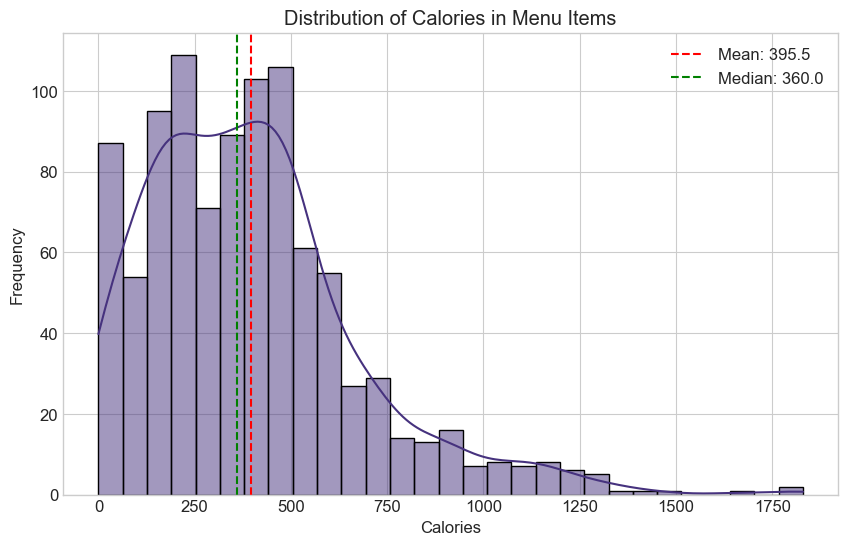

In [12]:
# Distribution of calories
plt.figure(figsize=(10, 6))
sns.histplot(df['calories'].dropna(), kde=True)
plt.title('Distribution of Calories in Menu Items')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.axvline(df['calories'].mean(), color='red', linestyle='--', label=f'Mean: {df["calories"].mean():.1f}')
plt.axvline(df['calories'].median(), color='green', linestyle='--', label=f'Median: {df["calories"].median():.1f}')
plt.legend()
plt.show()

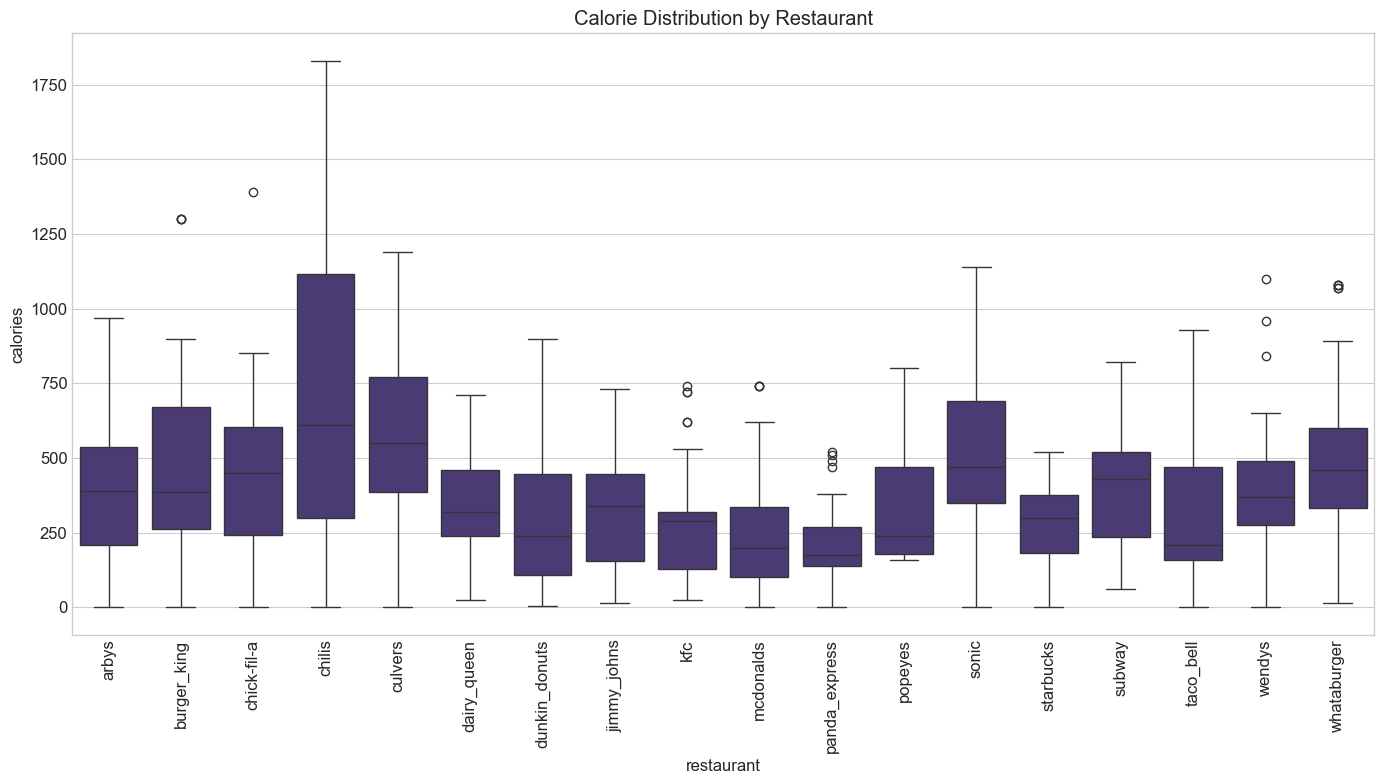

In [13]:
# Box plot of calories by restaurant
plt.figure(figsize=(14, 8))
sns.boxplot(x='restaurant', y='calories', data=df)
plt.title('Calorie Distribution by Restaurant')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

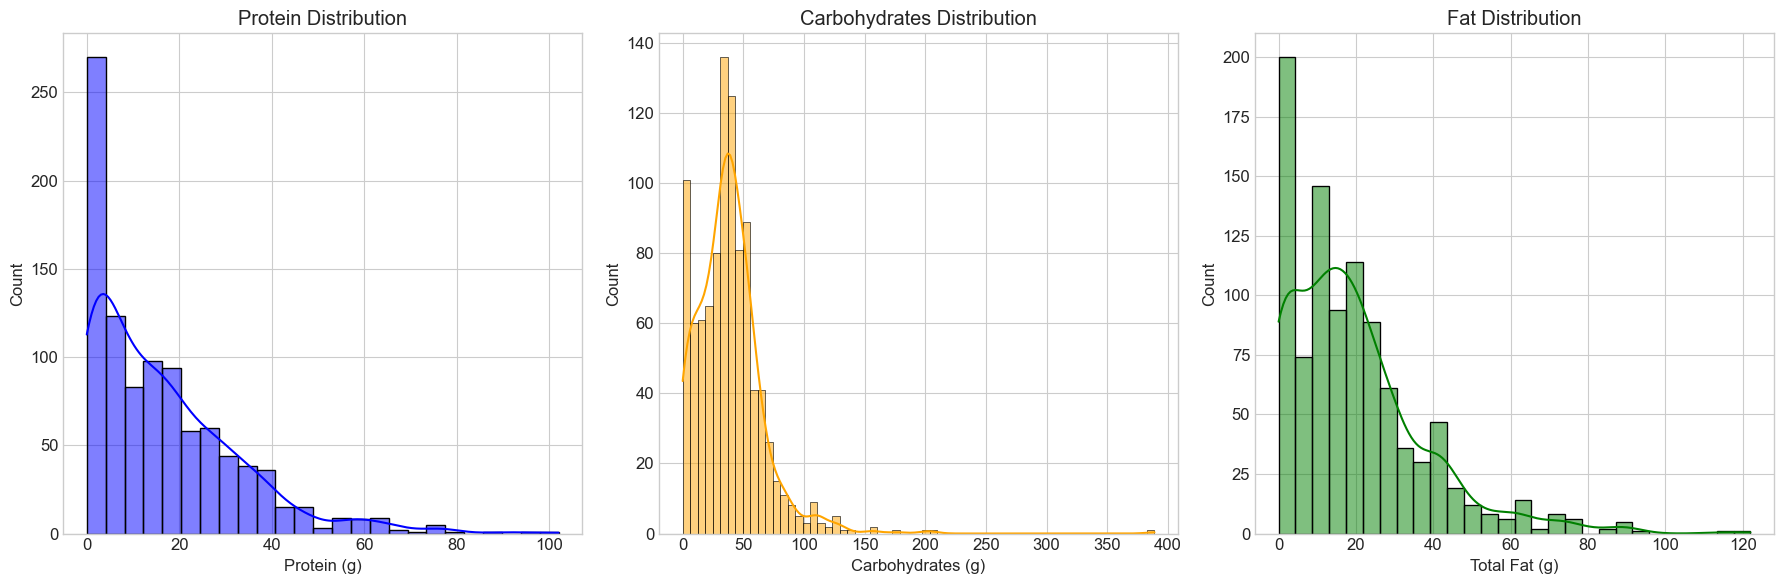

In [14]:
# Distribution of macronutrients
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['protein'].dropna(), kde=True, color='blue')
plt.title('Protein Distribution')
plt.xlabel('Protein (g)')

plt.subplot(1, 3, 2)
sns.histplot(df['carbohydrates'].dropna(), kde=True, color='orange')
plt.title('Carbohydrates Distribution')
plt.xlabel('Carbohydrates (g)')

plt.subplot(1, 3, 3)
sns.histplot(df['total_fat'].dropna(), kde=True, color='green')
plt.title('Fat Distribution')
plt.xlabel('Total Fat (g)')

plt.tight_layout()
plt.show()

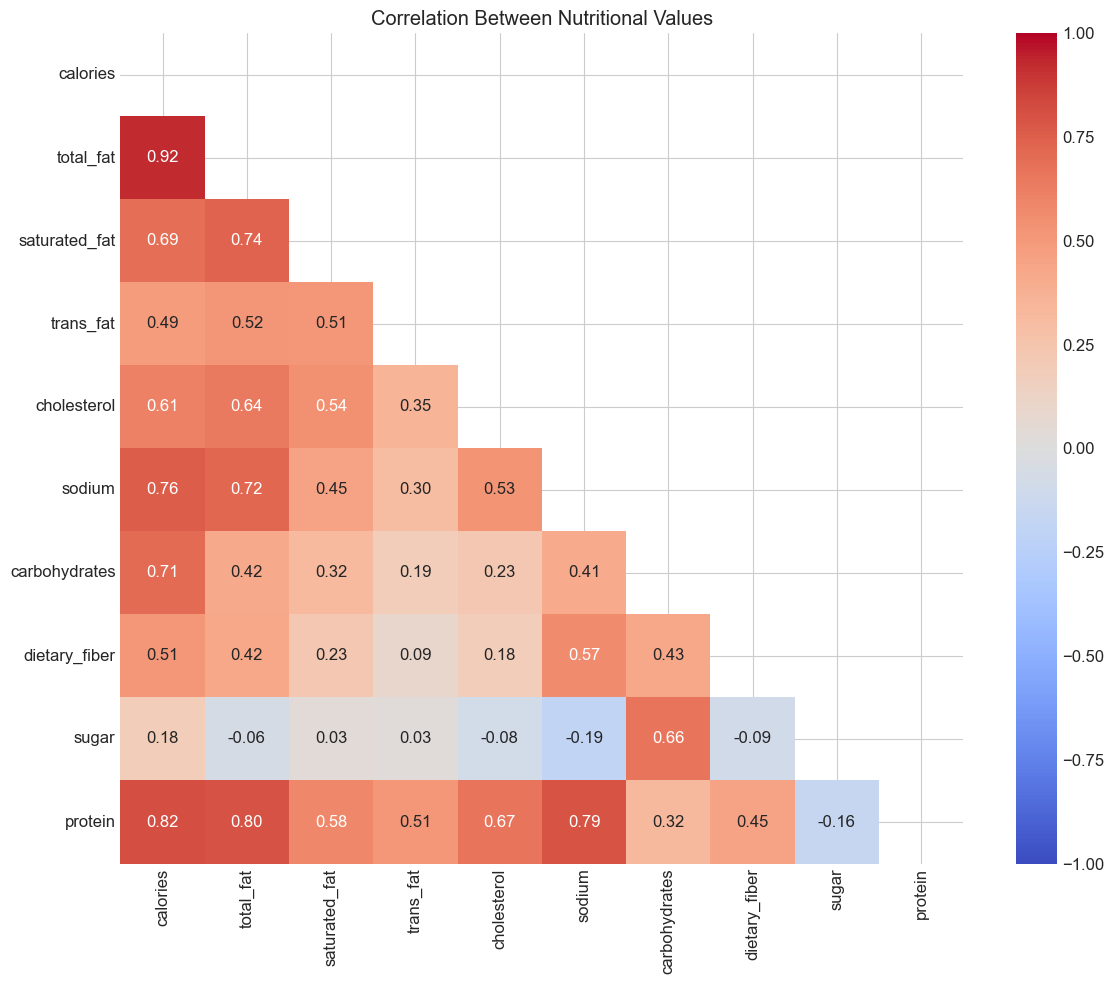

In [15]:
# Correlation heatmap of nutritional values
plt.figure(figsize=(12, 10))
corr = df[numeric_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Nutritional Values')
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

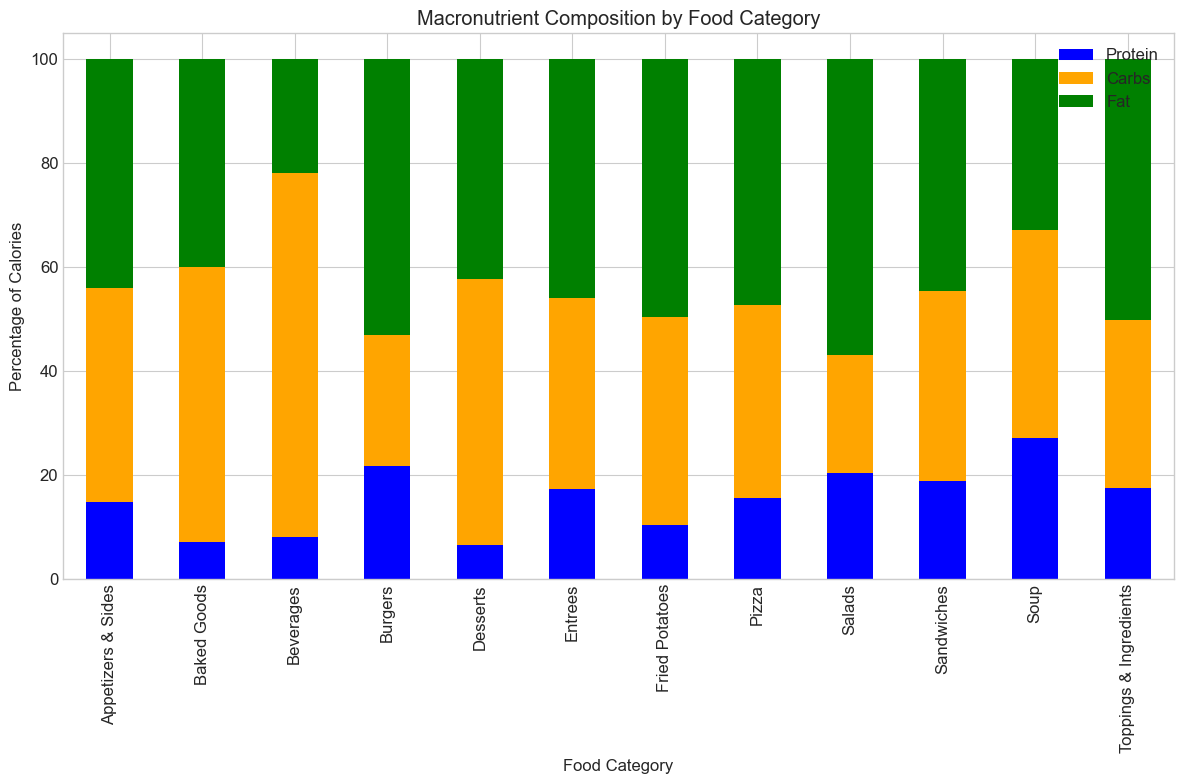

In [16]:
# Macronutrient composition by food category
# Calculate macronutrient percentages (assuming 4 calories per gram for protein and carbs, 9 for fat)
df['protein_calories'] = df['protein'] * 4
df['carbs_calories'] = df['carbohydrates'] * 4
df['fat_calories'] = df['total_fat'] * 9

# Group by food category and calculate mean percentages
category_macros = df.groupby('food_category')[['protein_calories', 'carbs_calories', 'fat_calories']].mean()
category_macros['total'] = category_macros.sum(axis=1)
category_macros['protein_pct'] = (category_macros['protein_calories'] / category_macros['total']) * 100
category_macros['carbs_pct'] = (category_macros['carbs_calories'] / category_macros['total']) * 100
category_macros['fat_pct'] = (category_macros['fat_calories'] / category_macros['total']) * 100

# Plot stacked bar chart
plt.figure(figsize=(14, 8))
category_macros[['protein_pct', 'carbs_pct', 'fat_pct']].plot(kind='bar', stacked=True, 
                                                            color=['blue', 'orange', 'green'])
plt.title('Macronutrient Composition by Food Category')
plt.xlabel('Food Category')
plt.ylabel('Percentage of Calories')
plt.xticks(rotation=90)
plt.legend(['Protein', 'Carbs', 'Fat'])
plt.tight_layout()
plt.show()

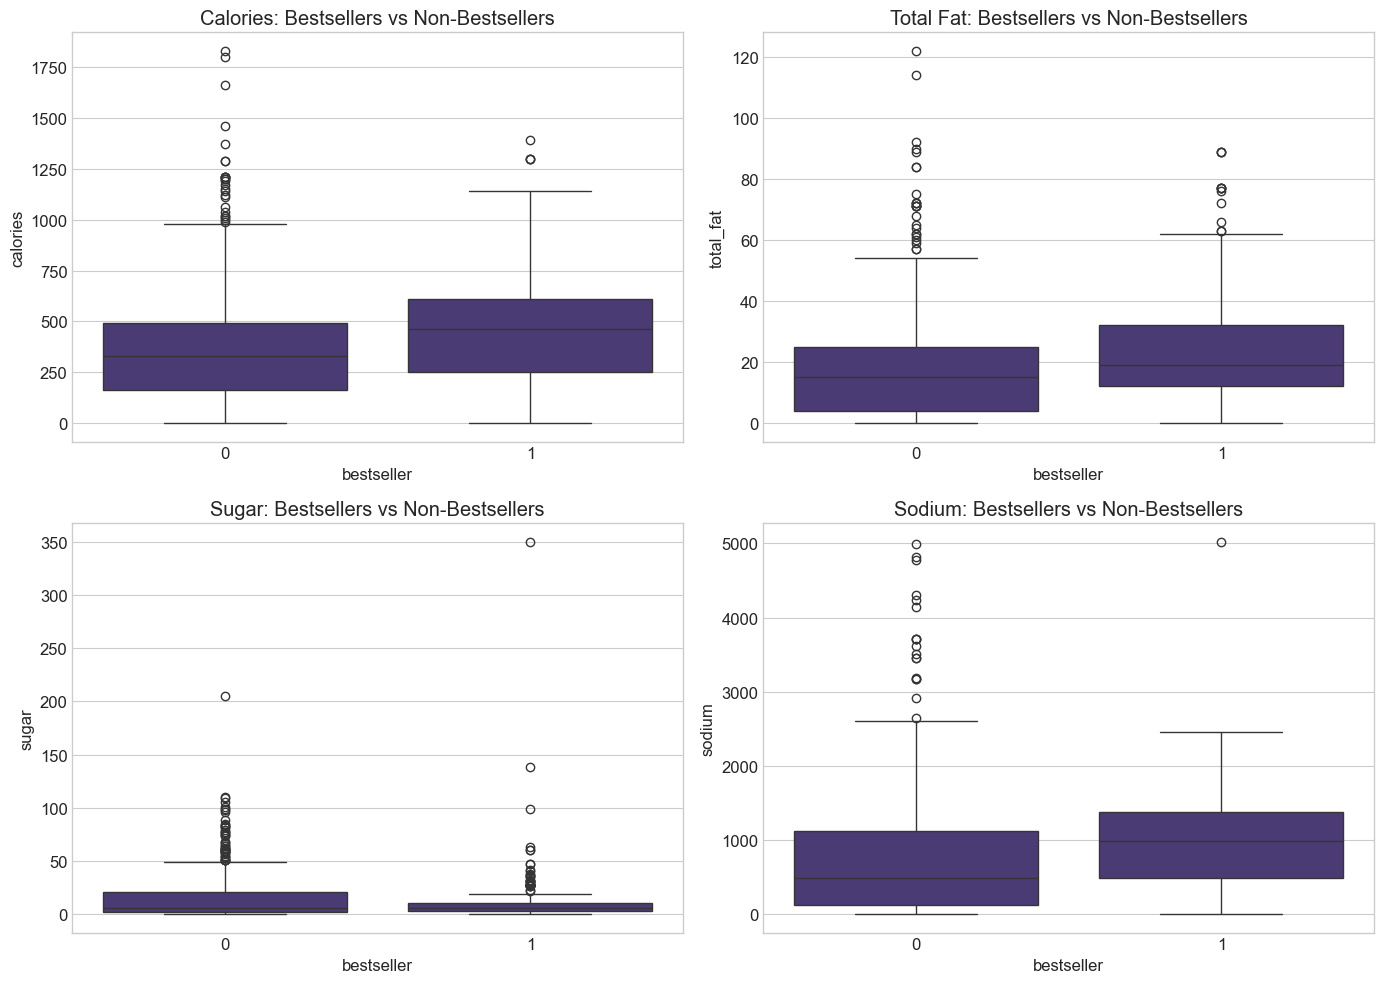

In [17]:
#analyze bestsellers
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='bestseller', y='calories', data=df)
plt.title('Calories: Bestsellers vs Non-Bestsellers')

plt.subplot(2, 2, 2)
sns.boxplot(x='bestseller', y='total_fat', data=df)
plt.title('Total Fat: Bestsellers vs Non-Bestsellers')

plt.subplot(2, 2, 3)
sns.boxplot(x='bestseller', y='sugar', data=df)
plt.title('Sugar: Bestsellers vs Non-Bestsellers')

plt.subplot(2, 2, 4)
sns.boxplot(x='bestseller', y='sodium', data=df)
plt.title('Sodium: Bestsellers vs Non-Bestsellers')

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

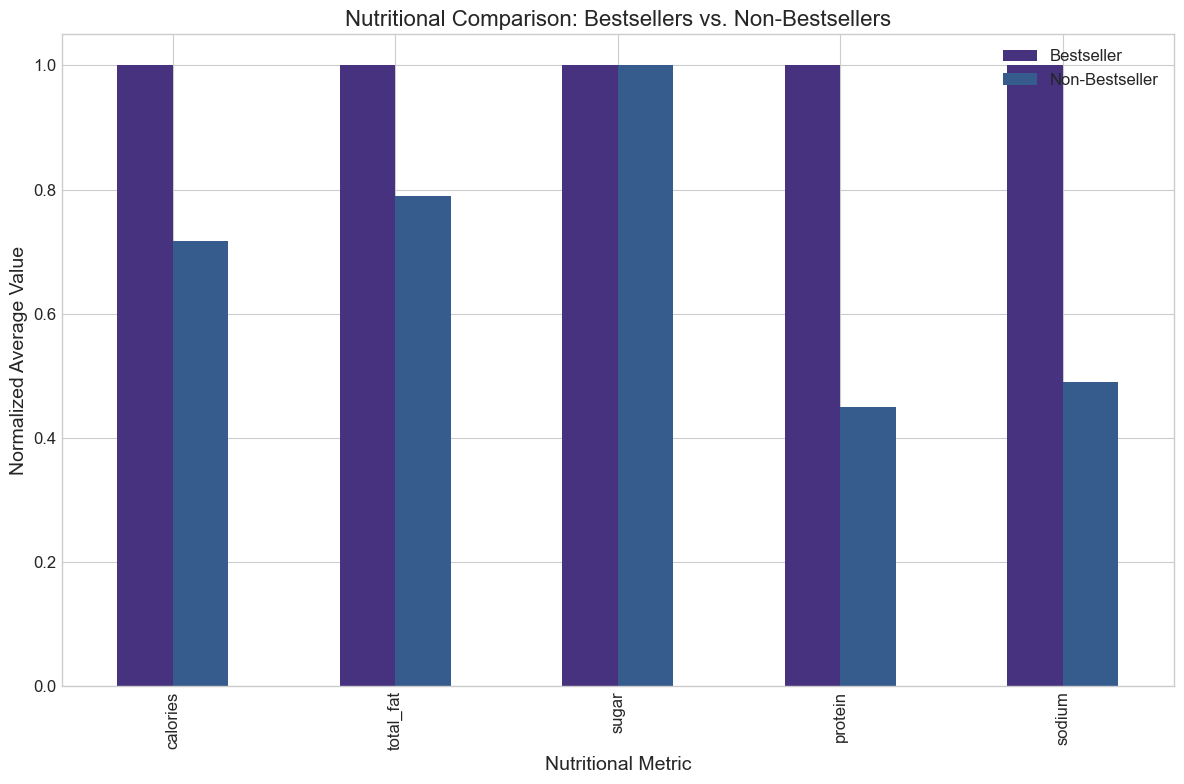

In [18]:
# 6. Compare nutritional content of bestsellers vs non-bestsellers

plt.figure(figsize=(14, 8))
nutrition_metrics = ['calories', 'total_fat', 'sugar', 'protein', 'sodium']

# Create a comparison dataframe
bestseller_comparison = pd.DataFrame({
    'Bestseller': df[df['bestseller'] == True][nutrition_metrics].median(),
    'Non-Bestseller': df[df['bestseller'] == False][nutrition_metrics].median()
})

# Normalize the values for better comparison - this divides by average nutrional values for all bestselling / all non-bestselling items
normalized = bestseller_comparison.div(bestseller_comparison.max(axis=1), axis=0)
normalized.plot(kind='bar')
plt.title('Nutritional Comparison: Bestsellers vs. Non-Bestsellers', fontsize=16)
plt.xlabel('Nutritional Metric', fontsize=14)
plt.ylabel('Normalized Average Value', fontsize=14)
plt.tight_layout()
plt.show()

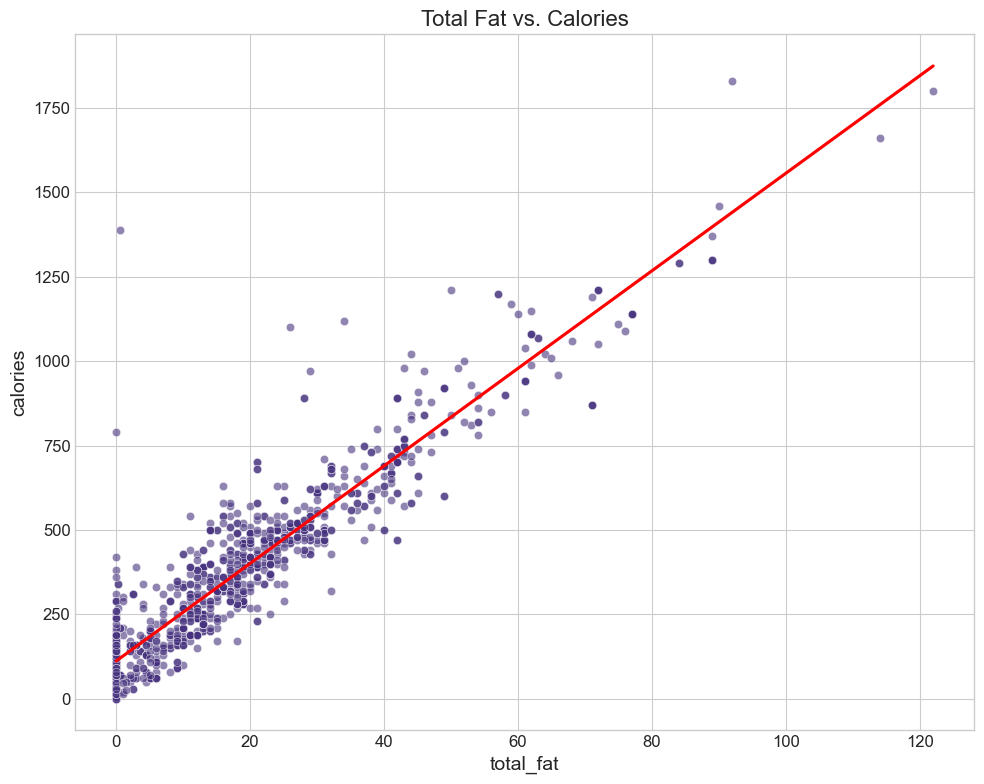

In [19]:
# 8. Fat vs. Calorie content - are they proportional?
plt.figure(figsize=(10, 8))
sns.scatterplot(x='total_fat', y='calories', data=df, alpha=0.6, 
                hue='food_category' if df['food_category'].nunique() <= 10 else None)
plt.title('Total Fat vs. Calories', fontsize=16)
plt.xlabel('Total Fat (g)', fontsize=14)
plt.ylabel('Calories', fontsize=14)
# Add a regression line
sns.regplot(x='total_fat', y='calories', data=df, scatter=False, ci=None, color='red')
if df['food_category'].nunique() <= 10:
    plt.legend(title='Food Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/hl/7yl66vtn2mn30d649bqpv1wc0000gn/T/ipykernel_49613/1381108561.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'New (2022)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['new_item_2022'] == True, 'item_status'] = 'New (2022)'


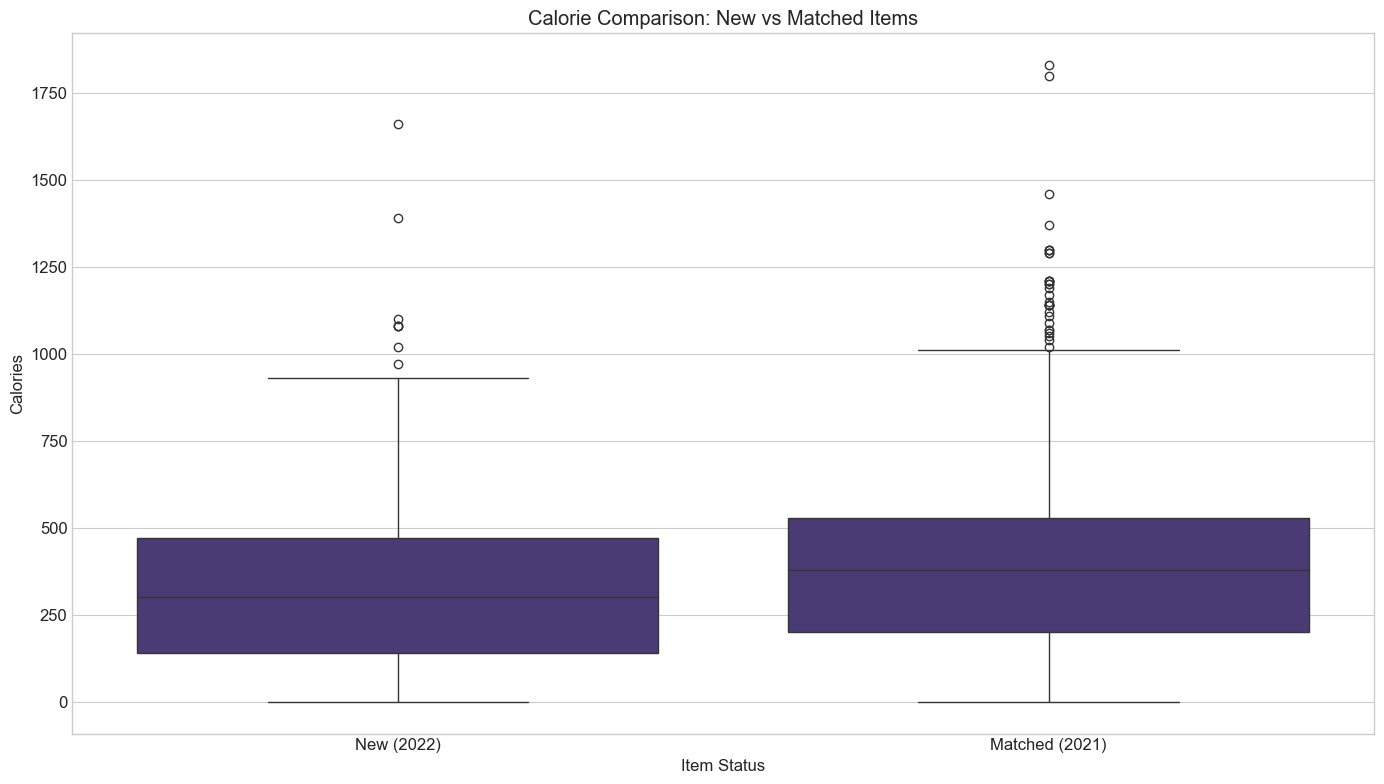

In [20]:
# Analysis of new items vs matched items
if 'new_item_2022' in df.columns and 'matched_2021' in df.columns:
    # Create a column that indicates item status
    df['item_status'] = np.nan
    df.loc[df['new_item_2022'] == True, 'item_status'] = 'New (2022)'
    df.loc[df['matched_2021'] == True, 'item_status'] = 'Matched (2021)'
    
    # Compare nutritional profiles
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='item_status', y='calories', data=df.dropna(subset=['item_status']))
    plt.title('Calorie Comparison: New vs Matched Items')
    plt.xlabel('Item Status')
    plt.ylabel('Calories')
    plt.tight_layout()
    plt.show()

In [21]:
# Convert nutritional columns to numeric, handling non-numeric values
numeric_cols = ['calories', 'total_fat', 'saturated_fat', 'trans_fat', 
                  'cholesterol', 'sodium', 'carbohydrates', 'dietary_fiber', 
                  'sugar', 'protein']

## DAILY VALUE NUTRITIONAL ANALYSIS

See how many bestseller items exceed daily intake values

In [36]:
#read df
df = pd.read_csv('final_merged_data.csv')

# Convert sodium to numeric
df['sodium'] = pd.to_numeric(df['sodium'], errors='coerce')

# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

#drop na
df = df.dropna()

print("\nBestseller distribution:")
print(df['bestseller'].value_counts())


Missing values per column:
cholesterol       4
sodium            1
carbohydrates     1
dietary_fiber    20
sugar             8
protein           1
price            22
dtype: int64

Bestseller distribution:
bestseller
0    662
1    260
Name: count, dtype: int64


In [37]:
# Daily Reference Values from FDA
daily_ref_values = {
    'calories':2000,
    'total_fat': 78, # grams
    'saturated_fat': 20, # grams
    'cholesterol': 300, #mg
    'carbohydrates': 275, # grams
    'sodium': 2300, #mg
    'dietary_fiber': 28, # grams
    'protein': 50, # grams
    'sugar': 50} # grams

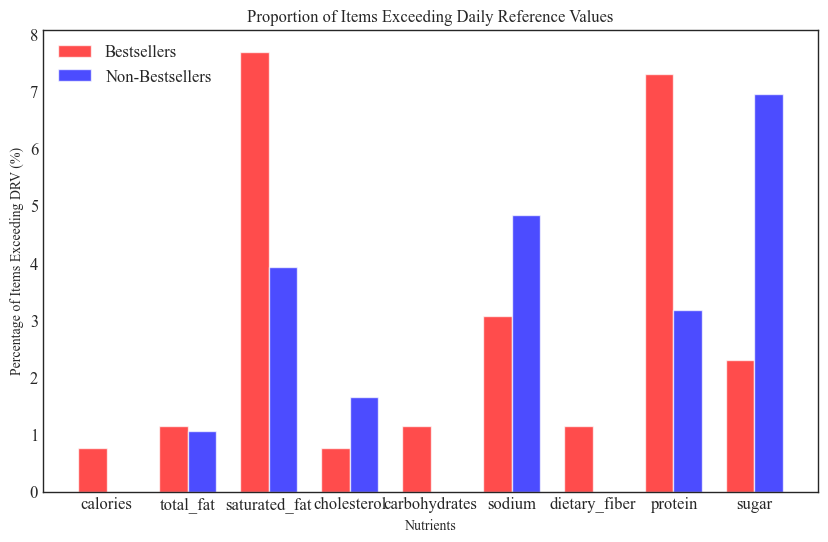

In [38]:
def calculate_excess_proportion(df, nutrient):
    # Separate bestsellers and non-bestsellers
    bestsellers = df[df['bestseller'] == 1]
    non_bestsellers = df[df['bestseller'] == 0]
    
    # Calculate excess for bestsellers
    bestsellers_excess = bestsellers[bestsellers[nutrient] > daily_ref_values[nutrient]]
    bestsellers_excess_prop = len(bestsellers_excess) / len(bestsellers) * 100
    
    # Calculate excess for non-bestsellers
    non_bestsellers_excess = non_bestsellers[non_bestsellers[nutrient] > daily_ref_values[nutrient]]
    non_bestsellers_excess_prop = len(non_bestsellers_excess) / len(non_bestsellers) * 100
    
    return bestsellers_excess_prop, non_bestsellers_excess_prop


plt.figure(figsize=(10, 6))

excess_data = {}
for nutrient in daily_ref_values.keys():
    excess_data[nutrient] = calculate_excess_proportion(df, nutrient)

# Bar plot of excess proportions
nutrients = list(daily_ref_values.keys())
bestsellers_excess = [excess_data[nut][0] for nut in nutrients]
non_bestsellers_excess = [excess_data[nut][1] for nut in nutrients]

x = np.arange(len(nutrients))
width = 0.35

plt.bar(x - width/2, bestsellers_excess, width, label='Bestsellers', color='red', alpha=0.7)
plt.bar(x + width/2, non_bestsellers_excess, width, label='Non-Bestsellers', color='blue', alpha=0.7)

plt.title('Proportion of Items Exceeding Daily Reference Values', fontsize=12)
plt.xlabel('Nutrients', fontsize=10)
plt.ylabel('Percentage of Items Exceeding DRV (%)', fontsize=10)
plt.xticks(x, nutrients)
plt.legend()

Text(0, 0.5, 'Amount (g)')

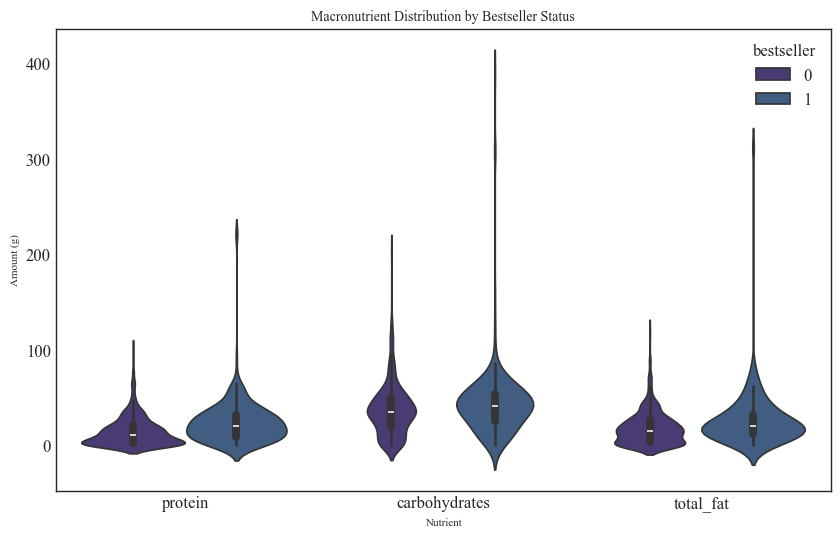

In [39]:
# Boxplot of Macronutrients
plt.figure(figsize=(10, 6))
macronutrients_boxplot = df.melt(id_vars=['bestseller'], 
                                    value_vars=['protein', 'carbohydrates', 'total_fat'], 
                                    var_name='Nutrient', 
                                    value_name='Amount')

sns.violinplot(x='Nutrient', y='Amount', hue='bestseller', data=macronutrients_boxplot)
plt.title('Macronutrient Distribution by Bestseller Status', fontsize=10)
plt.xlabel('Nutrient', fontsize=8)
plt.ylabel('Amount (g)', fontsize=8)

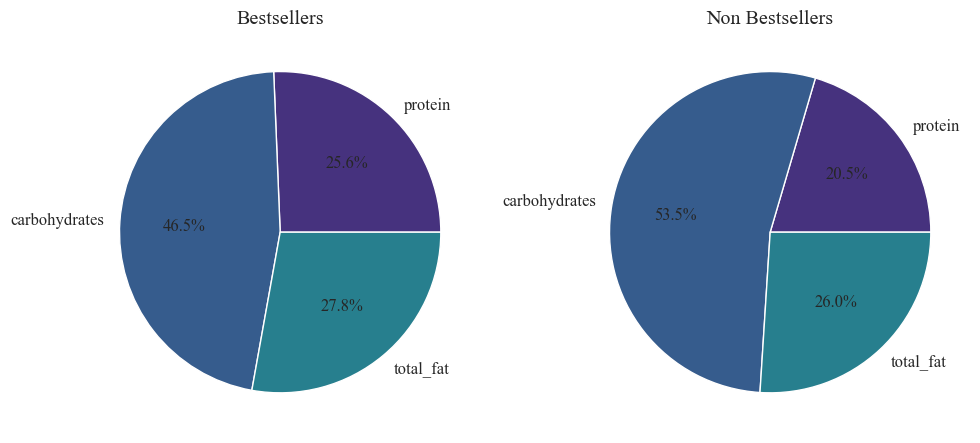

In [40]:
# Pie Charts of Macronutrient Composition
plt.figure(figsize=(10, 6))
def calculate_avg_macronutrients(group):
    return group[['protein', 'carbohydrates', 'total_fat']].mean()

bestsellers_avg = calculate_avg_macronutrients(df[df['bestseller'] == 1])
non_bestsellers_avg = calculate_avg_macronutrients(df[df['bestseller'] == 0])

plt.subplot(1,2,1)
plt.pie(bestsellers_avg, labels=bestsellers_avg.index, autopct='%1.1f%%')
plt.title('Bestsellers')

plt.subplot(1,2,2)
plt.pie(non_bestsellers_avg, labels=non_bestsellers_avg.index, autopct='%1.1f%%')
plt.title('Non Bestsellers')

plt.tight_layout()
plt.show()

## USE THIS VERSION FOR POSTER

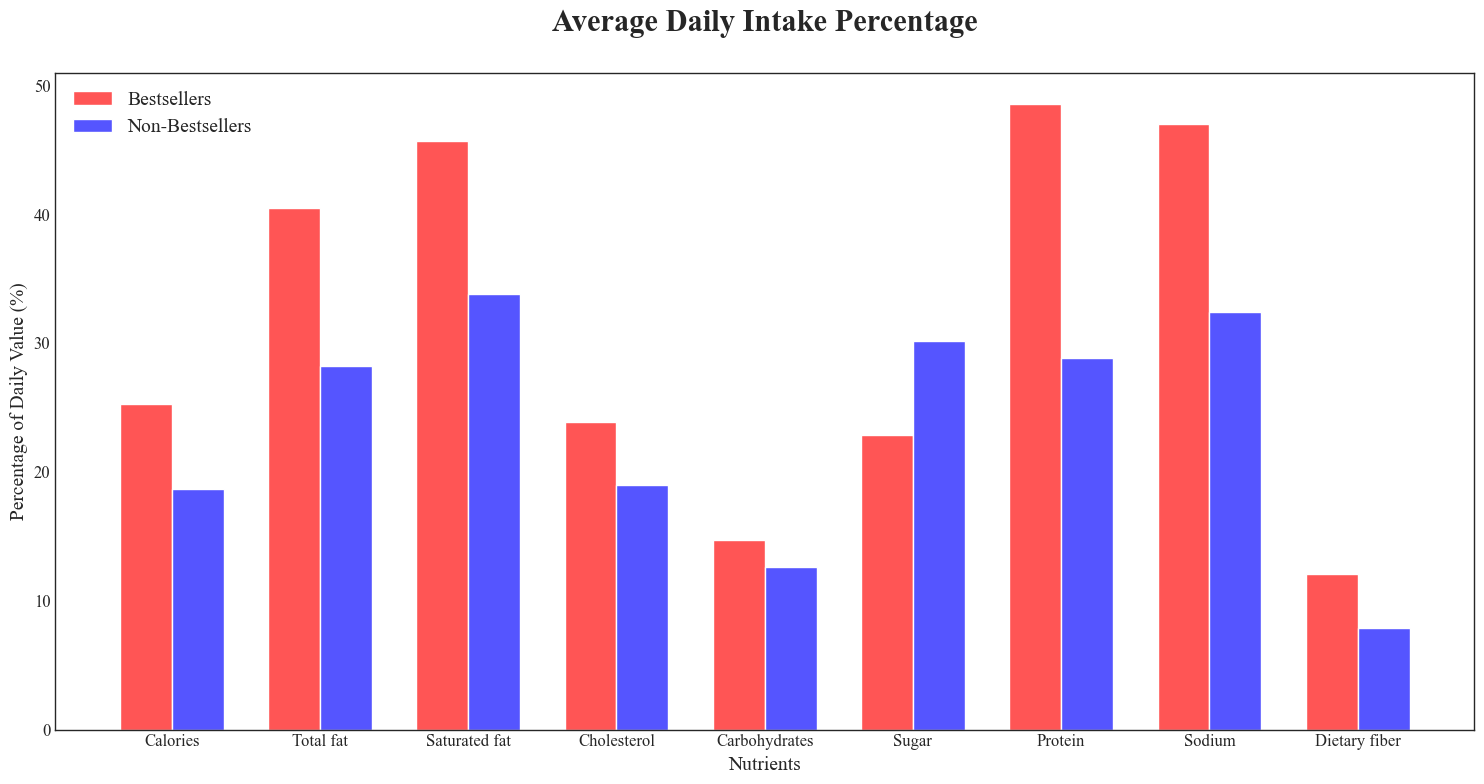

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define daily reference values dictionary (you need to add this)
daily_ref_values = {
    'calories': 2000,
    'total_fat': 65,
    'saturated_fat': 20,
    'cholesterol': 300,
    'carbohydrates': 300,
    'sugar': 50,
    'protein': 50,
    'sodium': 2300,
    'dietary_fiber': 25
}

# Define nutrients list based on the keys in daily_ref_values
nutrients = list(daily_ref_values.keys())

# Calculate percentage of daily intake for each nutrient
def calculate_daily_intake_percentage(group):
    percentages = {}
    for nutrient, ref_value in daily_ref_values.items():
        # Convert nutrient name to column name (lowercase, replace spaces)
        col_name = nutrient.lower().replace(' ', '_')
        if col_name in group.columns:
            # Calculate average percentage of daily value
            avg_percentage = group[col_name].mean() / ref_value * 100
            percentages[nutrient] = avg_percentage
    return pd.Series(percentages)

# Calculate for bestsellers and non-bestsellers
bestsellers_intake = calculate_daily_intake_percentage(df[df['bestseller'] == 1])
non_bestsellers_intake = calculate_daily_intake_percentage(df[df['bestseller'] == 0])

# Figure setup with Times New Roman font
plt.figure(figsize=(15, 8))
plt.rcParams['font.family'] = 'Times New Roman'

# Create the bar chart
bar_width = 0.35
x = np.arange(len(nutrients))

# Clean up nutrient labels - capitalize and remove underscores
cleaned_nutrients = [nutrient.replace('_', ' ').capitalize() for nutrient in nutrients]

# Create bars
ax = plt.subplot(111)
bestsellers_bars = ax.bar(x - bar_width/2, bestsellers_intake, bar_width, color='#FF5555', label='Bestsellers')
non_bestsellers_bars = ax.bar(x + bar_width/2, non_bestsellers_intake, bar_width, color='#5555FF', label='Non-Bestsellers')

# Remove the grid
ax.grid(False)

# Customize x-axis
plt.xlabel('Nutrients', fontsize=14, fontfamily='Times New Roman')
plt.ylabel('Percentage of Daily Value (%)', fontsize=14, fontfamily='Times New Roman')
plt.title('Average Daily Intake Percentage', fontsize=22, fontweight='bold', fontfamily='Times New Roman', pad=30)

# Set x-ticks at the center of the grouped bars
plt.xticks(x, cleaned_nutrients, fontsize=12, fontfamily='Times New Roman')

# Rotate x labels slightly for better readability if needed
plt.xticks(rotation=0)

# Add padding to the bottom to ensure labels are fully visible
plt.subplots_adjust(bottom=0.15)

# Increase legend font size
plt.legend(prop={'family': 'Times New Roman', 'size': 14}, loc='upper left')

# Ensure tight layout
plt.tight_layout()

calories     |       23.00% |           17.00%
total_fat    |       30.77% |           23.08%
saturated_fat |       30.00% |           30.00%
cholesterol  |       17.50% |           10.00%
carbohydrates |       13.67% |           11.67%
sugar        |       12.00% |           12.00%
protein      |       41.00% |           21.00%
sodium       |       43.70% |           22.17%
dietary_fiber |        8.00% |            4.00%


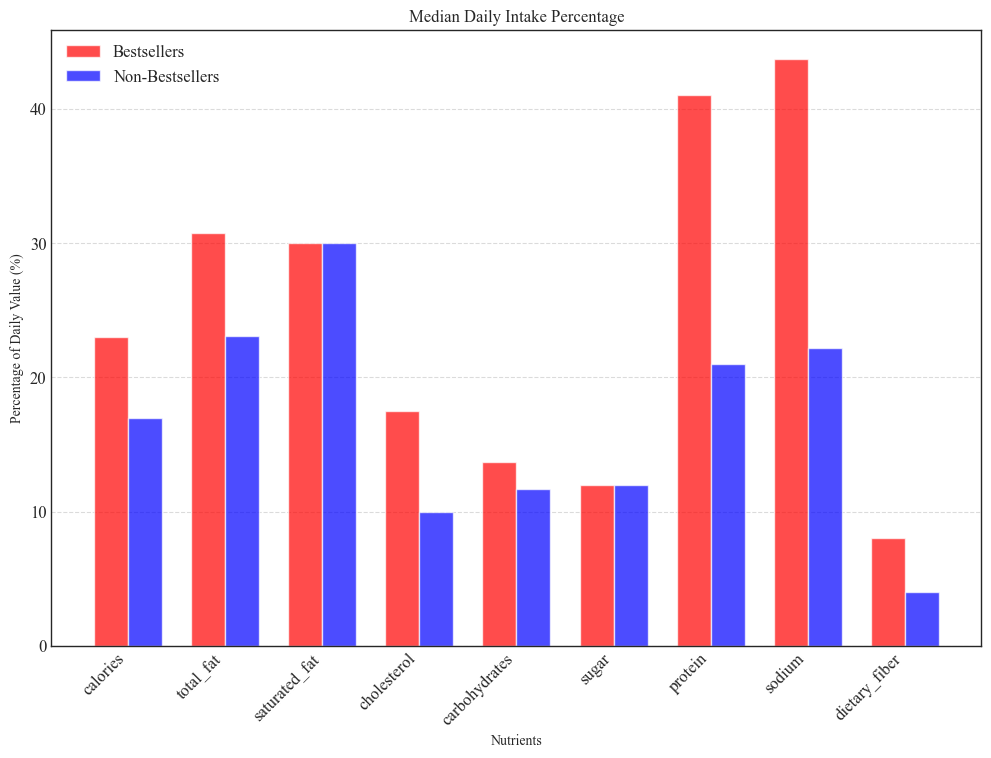

In [42]:
# Stacked Bar Chart of Daily Intake Percentages

# Calculate percentage of daily intake for each nutrient using MEDIAN
def calculate_daily_intake_percentage(group):
    percentages = {}
    for nutrient, ref_value in daily_ref_values.items():
        # Convert nutrient name to column name (lowercase, replace spaces)
        col_name = nutrient.lower().replace(' ', '_')
        if col_name in group.columns:
            # Calculate median percentage of daily value
            median_percentage = group[col_name].median() / ref_value * 100
            percentages[nutrient] = median_percentage
    return pd.Series(percentages)

# Calculate for bestsellers and non-bestsellers
bestsellers_intake = calculate_daily_intake_percentage(df[df['bestseller'] == 1])
non_bestsellers_intake = calculate_daily_intake_percentage(df[df['bestseller'] == 0])

# Prepare data for stacked bar
nutrients = list(daily_ref_values.keys())
x = np.arange(len(nutrients))
width = 0.35


plt.figure(figsize=(12, 8))
plt.bar(x - width/2, bestsellers_intake, width, label='Bestsellers', color='red', alpha=0.7)
plt.bar(x + width/2, non_bestsellers_intake, width, label='Non-Bestsellers', color='blue', alpha=0.7)

plt.title('Median Daily Intake Percentage', fontsize=12)
plt.xlabel('Nutrients', fontsize=10)
plt.ylabel('Percentage of Daily Value (%)', fontsize=10)
plt.xticks(x, nutrients, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
    

# Print intake percentages for referenc

for nutrient, ref_value in daily_ref_values.items():
    col_name = nutrient.lower().replace(' ', '_')
    if col_name in df.columns:
        bestseller_median = df[df['bestseller'] == 1][col_name].median() / ref_value * 100
        non_bestseller_median = df[df['bestseller'] == 0][col_name].median() / ref_value * 100
        
        print(f"{nutrient:<12} | {bestseller_median:>11.2f}% | {non_bestseller_median:>15.2f}%")

## USE THIS RADAR FOR POSTER - LABELLED VS UNLABELLED for reference

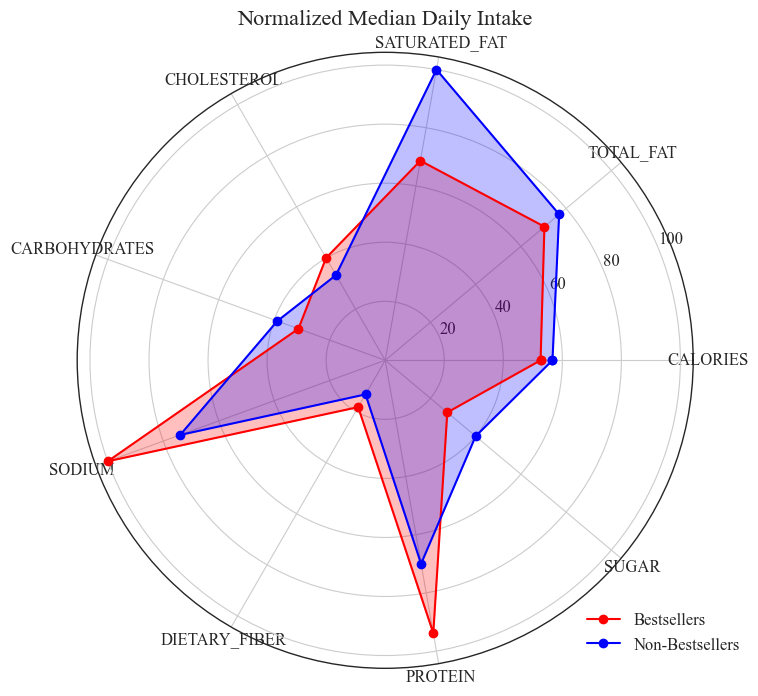

In [58]:
# 0. Define your exact order here
ordered_nutrients = [
    "calories",
        "total_fat",
            "saturated_fat",
                "cholesterol",
                    "carbohydrates",
                        "sodium",
                            "dietary_fiber",
                                "protein",
                                    "sugar"]
def calculate_daily_intake_percentage(group, order):
    pct = {}
    for nut in order:
        ref = daily_ref_values[nut]
        col = nut.lower().replace(" ", "_")
        if col in group:
            pct[nut] = group[col].median() / ref * 100
    return pd.Series(pct)

bs_int = calculate_daily_intake_percentage(df[df.bestseller==1], ordered_nutrients)
nb_int = calculate_daily_intake_percentage(df[df.bestseller==0], ordered_nutrients)

# normalize
bs_radar = bs_int / bs_int.max() * 100
nb_radar = nb_int / nb_int.max() * 100

# now everything uses `ordered_nutrients`
N = len(ordered_nutrients)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

bs_vals = bs_radar.tolist() + [bs_radar.iloc[0]]
nb_vals = nb_radar.tolist() + [nb_radar.iloc[0]]

labels = [nut.upper() for nut in ordered_nutrients]

fig, ax = plt.subplots(subplot_kw={'polar': True}, figsize=(8,8))
ax.plot(angles, bs_vals, 'o-', label="Bestsellers", color='red')
ax.fill(  angles, bs_vals, alpha=0.25, color='red')
ax.plot(angles, nb_vals, 'o-', label="Non-Bestsellers", color='blue')
ax.fill(  angles, nb_vals, alpha=0.25, color='blue')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Add title with padding
plt.title('Normalized Median Daily Intake', fontsize=16, fontfamily='Times New Roman', pad=20)

# Move legend to bottom right
plt.legend(loc='lower right', bbox_to_anchor=(1.1, 0.0), prop={'family': 'Times New Roman', 'size': 12})

# Ensure all text is in Times New Roman
for text in plt.gcf().findobj(plt.Text):
    text.set_fontfamily('Times New Roman')

#plt.savefig('radar_plot.png', dpi=300)


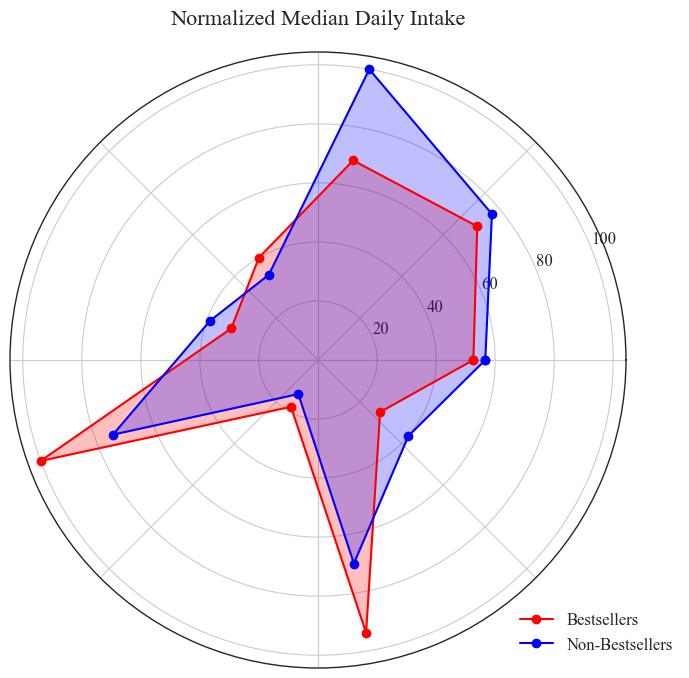

In [65]:
# 0. Define your exact order here
ordered_nutrients = [
    "calories",
        "total_fat",
            "saturated_fat",
                "cholesterol",
                    "carbohydrates",
                        "sodium",
                            "dietary_fiber",
                                "protein",
                                    "sugar"]
def calculate_daily_intake_percentage(group, order):
    pct = {}
    for nut in order:
        ref = daily_ref_values[nut]
        col = nut.lower().replace(" ", "_")
        if col in group:
            pct[nut] = group[col].median() / ref * 100
    return pd.Series(pct)

bs_int = calculate_daily_intake_percentage(df[df.bestseller==1], ordered_nutrients)
nb_int = calculate_daily_intake_percentage(df[df.bestseller==0], ordered_nutrients)

# normalize
bs_radar = bs_int / bs_int.max() * 100
nb_radar = nb_int / nb_int.max() * 100

# now everything uses `ordered_nutrients`
N = len(ordered_nutrients)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

bs_vals = bs_radar.tolist() + [bs_radar.iloc[0]]
nb_vals = nb_radar.tolist() + [nb_radar.iloc[0]]

labels = [nut.upper() for nut in ordered_nutrients]

fig, ax = plt.subplots(subplot_kw={'polar': True}, figsize=(8,8))
ax.plot(angles, bs_vals, 'o-', label="Bestsellers", color='red')
ax.fill(  angles, bs_vals, alpha=0.25, color='red')
ax.plot(angles, nb_vals, 'o-', label="Non-Bestsellers", color='blue')
ax.fill(  angles, nb_vals, alpha=0.25, color='blue')

#ax.set_xticks(angles[:-1])
ax.set_xticklabels('')

# Add title with padding
plt.title('Normalized Median Daily Intake', fontsize=16, fontfamily='Times New Roman', pad=20)

# Move legend to bottom right
plt.legend(loc='lower right', bbox_to_anchor=(1.1, 0.0), prop={'family': 'Times New Roman', 'size': 12})

# Ensure all text is in Times New Roman
for text in plt.gcf().findobj(plt.Text):
    text.set_fontfamily('Times New Roman')

#plt.savefig('radar_plot.png', dpi=300)


In [46]:
nutrients2 = [
 'total_fat',
 'carbohydrates',
 'protein']

([<matplotlib.axis.XTick at 0x169627c90>,
 [Text(1, 0, 'total_fat\n(Bestsellers)'),
  Text(2, 0, 'total_fat\n(Non-Bestsellers)'),
  Text(3, 0, 'carbohydrates\n(Bestsellers)'),
  Text(4, 0, 'carbohydrates\n(Non-Bestsellers)'),
  Text(5, 0, 'protein\n(Bestsellers)'),
  Text(6, 0, 'protein\n(Non-Bestsellers)')])

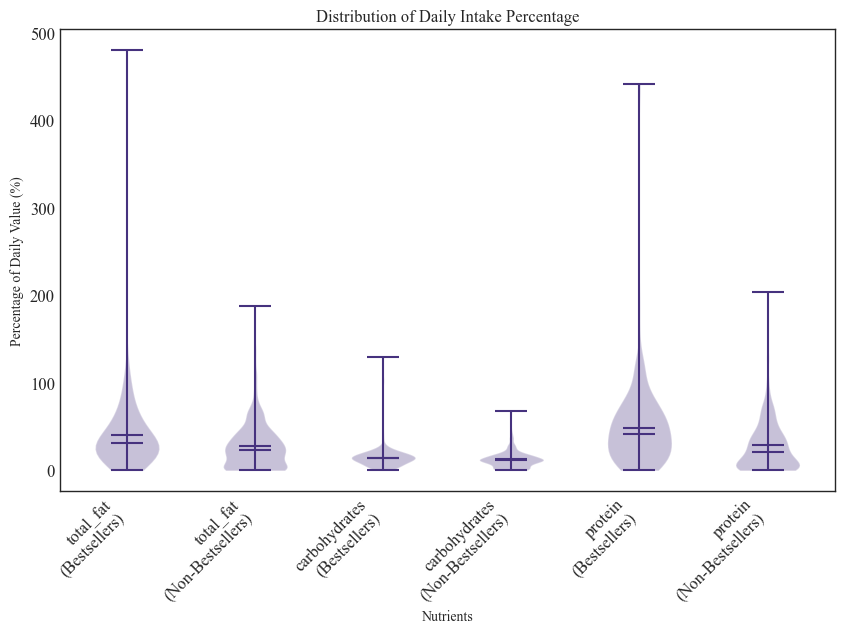

In [47]:
# 3. Violin Plot of Daily Intake Distribution
plt.figure(figsize=(10, 6))
    
# Prepare data for violin plot
intake_data = []
labels = []
for nutrient in nutrients2:
    col_name = nutrient.lower().replace(' ', '_')
    if col_name in df.columns:
        # Normalize to daily value
        normalized_data = df[col_name] / daily_ref_values[nutrient] * 100
        
        bestsellers_data = normalized_data[df['bestseller'] == 1]
        non_bestsellers_data = normalized_data[df['bestseller'] == 0]
        
        intake_data.append(bestsellers_data)
        intake_data.append(non_bestsellers_data)
        labels.append(f'{nutrient}\n(Bestsellers)')
        labels.append(f'{nutrient}\n(Non-Bestsellers)')

plt.violinplot(intake_data, showmeans=True, showextrema=True, showmedians=True)
plt.title('Distribution of Daily Intake Percentage', fontsize=12)
plt.xlabel('Nutrients', fontsize=10)
plt.ylabel('Percentage of Daily Value (%)', fontsize=10)
plt.xticks(np.arange(1, len(labels) + 1), labels, rotation=45, ha='right')

/var/folders/hl/7yl66vtn2mn30d649bqpv1wc0000gn/T/ipykernel_49613/2049087795.py:28: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/var/folders/hl/7yl66vtn2mn30d649bqpv1wc0000gn/T/ipykernel_49613/2049087795.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, fontfamily='Times New Roman', fontsize=12)


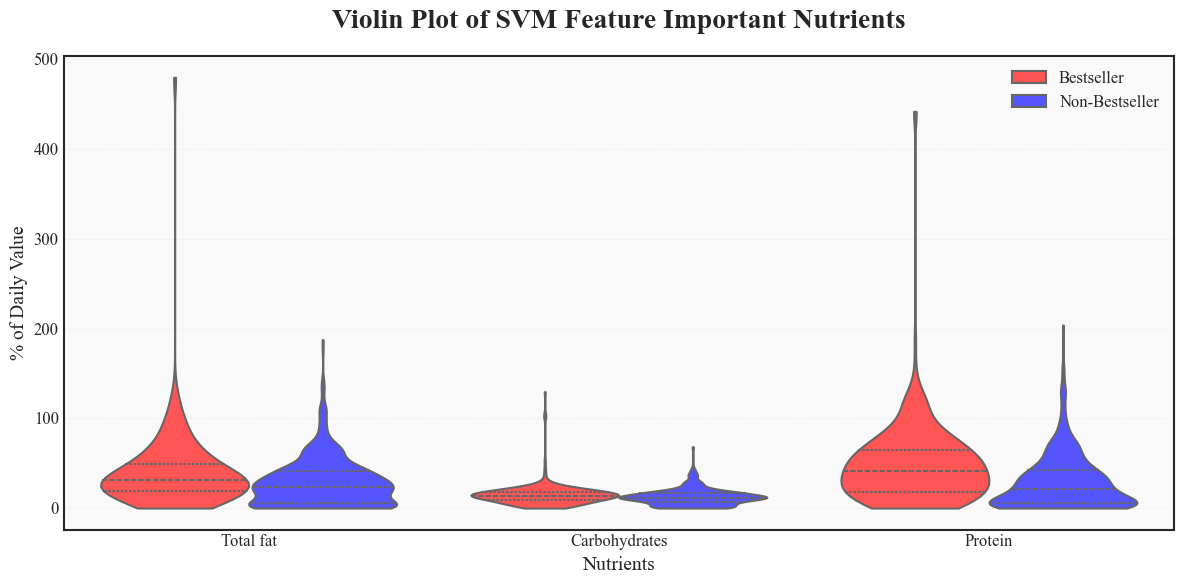

In [48]:
# 1. Set font family explicitly for all text elements
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.sans-serif'] = ['Times New Roman']

# 2. White background, no grid
sns.set_style('white')

# Build long-form DataFrame
rows = []
for nut in nutrients2:
    col = nut.lower().replace(' ', '_')
    if col not in df: 
        continue
    pct = df[col] / daily_ref_values[nut] * 100
    for flag, label in ((1, 'Bestseller'), (0, 'Non-Bestseller')):
        sub = pct[df['bestseller']==flag].dropna()
        rows += [{'Nutrient': nut, 'Percent': v, 'Type': label}
                 for v in sub]
plot_df = pd.DataFrame(rows)

# 3. Plot side-by-side violins with enhanced visibility
fig, ax = plt.subplots(figsize=(12, 6))

# Set font properties
plt.rc('font', family='Times New Roman')

# Make violins more prominent
sns.violinplot(
    data=plot_df,
    x='Nutrient',
    y='Percent',
    hue='Type',
    split=False,
    dodge=True,
    inner='quartile',
    palette={'Bestseller':'#FF5555','Non-Bestseller':'#5555FF'},
    cut=0,
    scale='width',  # Make violins fill available space
    linewidth=1.5,  # Thicker outline
    saturation=1.0, # More saturated colors
    ax=ax)

# Add a subtle background grid just for the y-axis for readability
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
ax.set_axisbelow(True)  # Keep grid behind the violins

# 4. Tweak labels with larger fonts
ax.set_xlabel('Nutrients', fontsize=14, fontfamily='Times New Roman')
ax.set_ylabel('% of Daily Value', fontsize=14, fontfamily='Times New Roman')
ax.set_title('Violin Plot of SVM Feature Important Nutrients', fontsize=20, fontfamily='Times New Roman', fontweight='bold', pad=20)

# Uppercase + remove underscores in tick labels and make them larger
new_labels = [lab.get_text().capitalize().replace('_',' ') 
              for lab in ax.get_xticklabels()]
ax.set_xticklabels(new_labels, fontfamily='Times New Roman', fontsize=12)

# Set y-tick labels font
ax.tick_params(axis='y', labelsize=12)
for label in ax.get_yticklabels():
    label.set_fontfamily('Times New Roman')

# Set legend font and make it more prominent
legend = ax.legend(title='', fontsize=12)
plt.setp(legend.get_texts(), family='Times New Roman')

# Add a border around the plot
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Apply Times New Roman to all text elements
for text in fig.findobj(plt.Text):
    text.set_fontfamily('Times New Roman')

# Add a subtle background color to enhance contrast
ax.set_facecolor('#f9f9f9')

# final layout
plt.tight_layout()

plt.savefig('violin_plot.png', dpi=300)

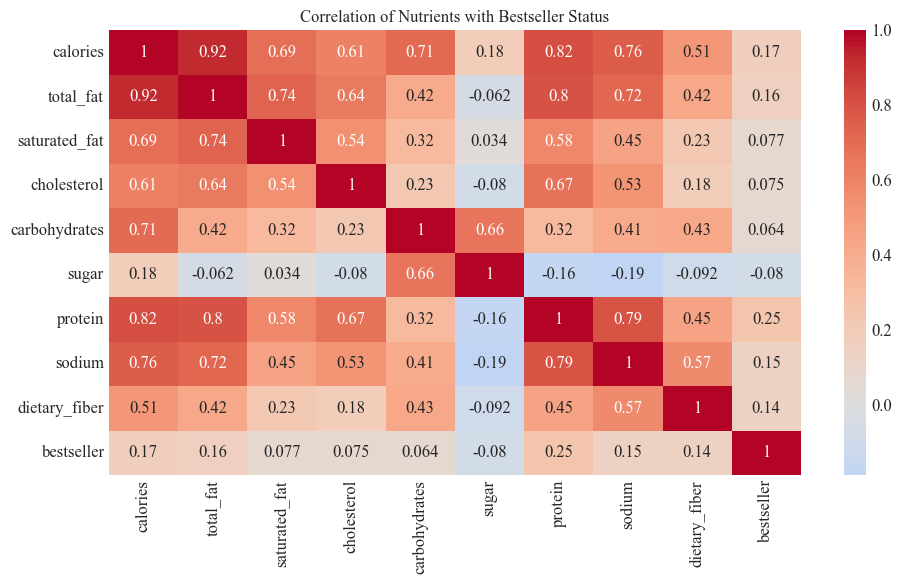

In [35]:
#Heatmap of Correlation
plt.figure(figsize=(10, 6))
# Select relevant columns
nutrients_cols = [nut.lower().replace(' ', '_') for nut in nutrients if nut.lower().replace(' ', '_') in df.columns]
corr_matrix = df[nutrients_cols + ['bestseller']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Nutrients with Bestseller Status', fontsize=12)

plt.tight_layout()
plt.show()